<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/03_cnn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://poloclub.github.io/cnn-explainer/

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-12-30 21:05:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   233MB/s    in 0.4s    

2021-12-30 21:05:18 (233 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [3]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [4]:
#Visualization
# Get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
#Create list of class names from subdirectories
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
# visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  #Get random image
  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img


Image shape: (512, 512, 3)


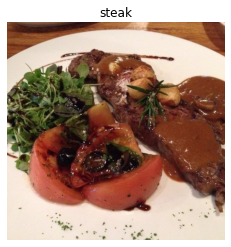

In [6]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [7]:
import tensorflow as tf
tf.constant(img,dtype=tf.float32)

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[128.,  73.,  34.],
        [131.,  75.,  38.],
        [131.,  75.,  40.],
        ...,
        [227., 202., 197.],
        [213., 188., 184.],
        [209., 184., 180.]],

       [[124.,  69.,  30.],
        [127.,  71.,  34.],
        [129.,  75.,  39.],
        ...,
        [240., 215., 208.],
        [226., 201., 196.],
        [220., 195., 190.]],

       [[132.,  78.,  40.],
        [134.,  80.,  42.],
        [135.,  81.,  45.],
        ...,
        [254., 230., 220.],
        [246., 221., 214.],
        [244., 219., 212.]],

       ...,

       [[242., 229., 212.],
        [241., 228., 211.],
        [240., 227., 210.],
        ...,
        [237., 222., 201.],
        [238., 223., 204.],
        [238., 223., 204.]],

       [[241., 228., 211.],
        [240., 227., 210.],
        [239., 226., 209.],
        ...,
        [237., 222., 201.],
        [236., 221., 202.],
        [236., 221., 202.]],

       [[240., 22

In [8]:
# Build CNN network
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

#Image proprocessing
train_datagen =ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

valid_datagen =ImageDataGenerator(rescale=1./255)

# Setup paths for data directories
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Build CNN model (same as the Tiny VGG on the CNN explainer website)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation="relu",
                                 input_shape=(224,224,3)))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [11]:
# FIND BEST LR VALUE
# Create a learning rate scheduler callback
"""
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch
history=model.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data), # len(train_data) - number of batches
          validation_data=valid_data,
          validation_steps=len(valid_data),
          callbacks=[lr_scheduler]) 
"""

'\nlr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch\nhistory=model.fit(train_data,\n          epochs=100,\n          steps_per_epoch=len(train_data), # len(train_data) - number of batches\n          validation_data=valid_data,\n          validation_steps=len(valid_data),\n          callbacks=[lr_scheduler]) \n'

In [12]:
# Plot the learning rate versus the loss
"""
import numpy as np
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.semilogx(lrs, history.history["val_loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");
"""
#7.0795e-04

'\nimport numpy as np\nlrs = 1e-4 * (10 ** (np.arange(100)/20))\nplt.figure(figsize=(10, 7))\nplt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale\nplt.semilogx(lrs, history.history["val_loss"]) # we want the x-axis (learning rate) to be log scale\nplt.xlabel("Learning Rate")\nplt.ylabel("Loss")\nplt.title("Learning rate vs. loss");\n'

In [13]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.5,
                                                patience=3,
                                                min_lr=1e-5),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5)]

In [ ]:
history=model.fit(train_data,
          epochs=100,
          steps_per_epoch=len(train_data), # len(train_data) - number of batches
          validation_data=valid_data,
          validation_steps=len(valid_data),
          callbacks=callbacks) 

Epoch 1/100
47/47 [==============================] - 31s 556ms/step - loss: 0.6703 - accuracy: 0.5433 - val_loss: 0.5208 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 2/100
47/47 [==============================] - 25s 532ms/step - loss: 0.5201 - accuracy: 0.7500 - val_loss: 0.3905 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 3/100
47/47 [==============================] - 25s 538ms/step - loss: 0.4825 - accuracy: 0.7720 - val_loss: 0.3406 - val_accuracy: 0.8440 - lr: 0.0010
Epoch 4/100
47/47 [==============================] - 26s 561ms/step - loss: 0.4803 - accuracy: 0.7840 - val_loss: 0.3733 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 5/100
47/47 [==============================] - 25s 541ms/step - loss: 0.4546 - accuracy: 0.7947 - val_loss: 0.3872 - val_accuracy: 0.8400 - lr: 0.0010
Epoch 6/100
47/47 [==============================] - 25s 538ms/step - loss: 0.4643 - accuracy: 0.7953 - val_loss: 0.3349 - val_accuracy: 0.8740 - lr: 0.0010
Epoch 7/100
47/47 [==============================] - 26s 5

In [ ]:
print(history.history.keys())
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs")
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

In [ ]:
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
plt.plot(epochs,acc,'bo',label='Train metric')
plt.plot(epochs,val_acc,'g',label='Validation metric')
plt.title('Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend();